In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)
print('train_set:\t', x_train.shape) # 60,000 images
print("y_train :\t",y_train.shape)
print('test_set:\t', x_test.shape) # 10,000 images
print("y_test  :\t",y_test.shape)

train_set:	 (60000, 28, 28, 1)
y_train :	 (60000,)
test_set:	 (10000, 28, 28, 1)
y_test  :	 (10000,)


In [4]:
#on normalise les donneés
x_train = x_train / 255
x_test = x_test / 255

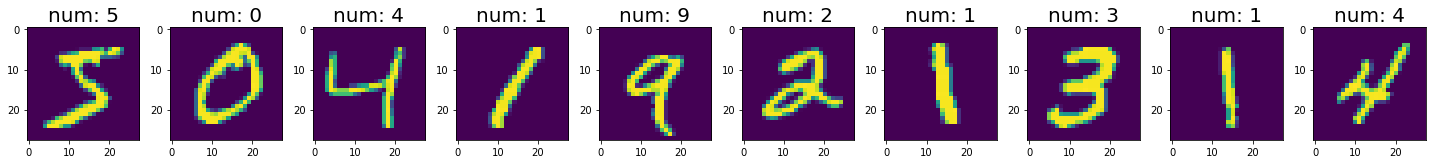

In [5]:
#Visualisation des données

plt.figure(figsize=(20,4))
for i in range (10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.title(f"num: {y_train[i]}",fontsize=20)
    
plt.tight_layout()
plt.show()

In [6]:
model=keras.Sequential([
    
    keras.layers.Input((28,28,1)),
    keras.layers.Conv2D(8, (3,3),  activation='relu',strides=(1, 1), padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    #la taille de l'images est (14,14,32)
    
    keras.layers.Conv2D(16,(3,3),activation='relu',strides=(1, 1), padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),
    #la taille de l'images est (7,7,64)
    
    keras.layers.Flatten(), # Conversion des matrices 3D en vecteur 1D
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10,activation='softmax')
    
])

In [7]:
model.summary()
#categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0

In [7]:
!pip install scikeras

In [8]:
EPOCH = np.array([16,10])
BATCH_SIZE = np.array([128,512])
hyperMatrix = dict(epochs=EPOCH, batch_size=BATCH_SIZE)

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
model_KerasClassifier = KerasClassifier(model=model,verbose=1,optimizer='adam')
gs = GridSearchCV(estimator=model_KerasClassifier, param_grid=hyperMatrix )

# On lance l'entrainement
gs.fit(x_train, y_train)

In [41]:
print(f"Meilleur Paramétrer:\t{gs.best_params_}")
print(f"Meilleur Score:\t\t{gs.best_score_*100}%")

Meilleur Paramétrer:	{'batch_size': 128, 'epochs': 16}
Meilleur Score:		98.83166666666666%


In [9]:
batch_size = 128
epochs = 16
history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
469/469 [==============================] - 9s 18ms/step - loss: 0.4610 - accuracy: 0.8546 - val_loss: 0.1047 - val_accuracy: 0.9667
Epoch 2/16
469/469 [==============================] - 8s 17ms/step - loss: 0.1643 - accuracy: 0.9487 - val_loss: 0.0623 - val_accuracy: 0.9786
Epoch 3/16
469/469 [==============================] - 9s 19ms/step - loss: 0.1262 - accuracy: 0.9613 - val_loss: 0.0516 - val_accuracy: 0.9825
Epoch 4/16
469/469 [==============================] - 9s 19ms/step - loss: 0.1054 - accuracy: 0.9667 - val_loss: 0.0448 - val_accuracy: 0.9848
Epoch 5/16
469/469 [==============================] - 8s 18ms/step - loss: 0.0944 - accuracy: 0.9707 - val_loss: 0.0398 - val_accuracy: 0.9864
Epoch 6/16
469/469 [==============================] - 9s 19ms/step - loss: 0.0815 - accuracy: 0.9745 - val_loss: 0.0386 - val_accuracy: 0.9869
Epoch 7/16
469/469 [==============================] - 8s 18ms/step - loss: 0.0780 - accuracy: 0.9755 - val_loss: 0.0362 - val_accuracy: 0.9875

In [10]:
score = model.evaluate(x_test, y_test, verbose=1)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9909


[0.027342859655618668, 0.9908999800682068]

In [12]:
history.history(loss)

NameError: name 'loss' is not defined

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

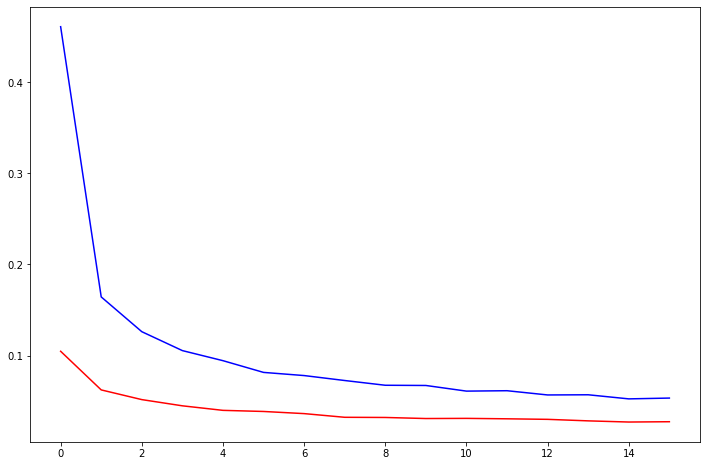

In [18]:
plt.figure(figsize=(12,8))
#plt.subplots(2,1,1)
plt.plot(history.history['loss'],label="training loss",c='b')
plt.plot(history.history['val_loss'],label="validation loss",c='r')
plt.xlabel()
plt.ylabel()
plt.title("__")
plt.legend(fontsize=20)
plt.show()